# Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep

In [18]:
import pickle

# Read Data

In [3]:
Graph = nx.read_edgelist('Data/facebookData.txt',create_using=nx.Graph(),nodetype=int)

# Read Decision Matrix

In [23]:
#Read our decision Matrix
res = pd.read_csv("Data/res.csv")
res.head(10)

,Node,DC,BC,CC,EC,S+,S-,C
0,107,0.258791,0.480518,0.459699,2.606940e-04,0.019029,0.200396,0.913277
1,1684,0.196137,0.337797,0.393606,7.164260e-06,0.061948,0.141539,0.695566
2,1912,0.186974,0.229295,0.350947,9.540696e-02,0.102563,0.100961,0.496063
3,3437,0.135463,0.236115,0.314413,9.531613e-08,0.103349,0.098846,0.488865
4,0,0.085934,0.146306,0.353343,3.391796e-05,0.140349,0.061395,0.304321
5,1085,0.016345,0.149015,0.357852,3.164082e-06,0.142845,0.060458,0.297379
6,698,0.016840,0.115330,0.271189,1.116876e-09,0.155715,0.046803,0.231106
7,567,0.015602,0.096310,0.328881,9.932295e-06,0.163087,0.039165,0.193646
8,58,0.002972,0.084360,0.397402,5.898120e-04,0.168330,0.034346,0.169464
9,428,0.028479,0.064309,0.394837,5.990065e-04,0.174851,0.026805,0.132923


# The top-10 ranked nodes by Topsis and Centrality measures

In [5]:
#The top-10 ranked nodes by degree centrality (DC)
DCR = res[["Node", "DC"]]
DCR = DCR.sort_values(by='DC', ascending=False)
DCR.rename(columns = {'Node':'DCN'}, inplace=True)

DCR["DCN"].to_csv("Data/DCR.csv",index=False)

In [6]:
#The top-10 ranked nodes by betweenness centrality (BC)
BCR = res[["Node", "BC"]]
BCR = BCR.sort_values(by='BC', ascending=False)
BCR.rename(columns = {'Node':'BCN'}, inplace=True)

BCR["BCN"].to_csv("Data/BCR.csv",index=False)

In [7]:
#The top-10 ranked nodes by closeness centrality (CC)
CCR = res[["Node", "CC"]]
CCR = CCR.sort_values(by='CC', ascending=False)
CCR.rename(columns = {'Node':'CCN'}, inplace=True)

CCR["CCN"].to_csv("Data/CCR.csv",index=False)

In [8]:
#The top-10 ranked nodes by eigenvector centrality (EC)
ECR = res[["Node", "EC"]]
ECR = ECR.sort_values(by='EC', ascending=False)
ECR.rename(columns = {'Node':'ECN'}, inplace=True)

ECR["ECN"].to_csv("Data/ECR.csv",index=False)

In [9]:
fac = pd.concat([pd.read_csv("Data/DCR.csv"),pd.read_csv("Data/BCR.csv"), pd.read_csv("Data/CCR.csv"), pd.read_csv("Data/ECR.csv")],axis=1)

In [10]:
#Concate the results
facebook = pd.concat([fac,pd.read_csv("Data/Topsis.csv")],axis=1)

facebook = facebook.head(10)
facebook

,DCN,BCN,CCN,ECN,Node
0,107,107,107,1912,107
1,1684,1684,58,2266,1684
2,1912,3437,428,2206,1912
3,3437,1912,563,2233,3437
4,0,1085,1684,2464,0
5,2543,0,171,2142,1085
6,2347,698,348,2218,698
7,1888,567,483,2078,567
8,1800,58,414,2123,58
9,1663,428,376,1993,428


# Application SI Model

In [11]:
def SI(node):
    n = 4039
    model = ep.SIModel(Graph)
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 1)
    cfg.add_model_initial_configuration('Infected', node)
    model.set_initial_status(cfg)
    res = pd.DataFrame(columns=['iteration', 'nb_Susceptible', 'Nb_infected'])
    for i in range(n):
        iteration = model.iteration()
        res.loc[len(res.index)] = [iteration['iteration'],iteration['node_count'][0], iteration['node_count'][1] ]
        if iteration['node_count'][1] == n:
            break 
    return res

In [12]:
Rank_DC = SI(set(facebook['DCN']))
Rank_BC = SI(set(facebook['BCN']))
Rank_CC = SI(set(facebook['CCN']))
Rank_EC = SI(set(facebook['ECN']))
Rank_Topsis = SI(set(facebook['Node']))

In [13]:
Rank_DC

,iteration,nb_Susceptible,Nb_infected
0,0,4029,10
1,1,576,3463
2,2,201,3838
3,3,55,3984
4,4,0,4039


# Plot the results

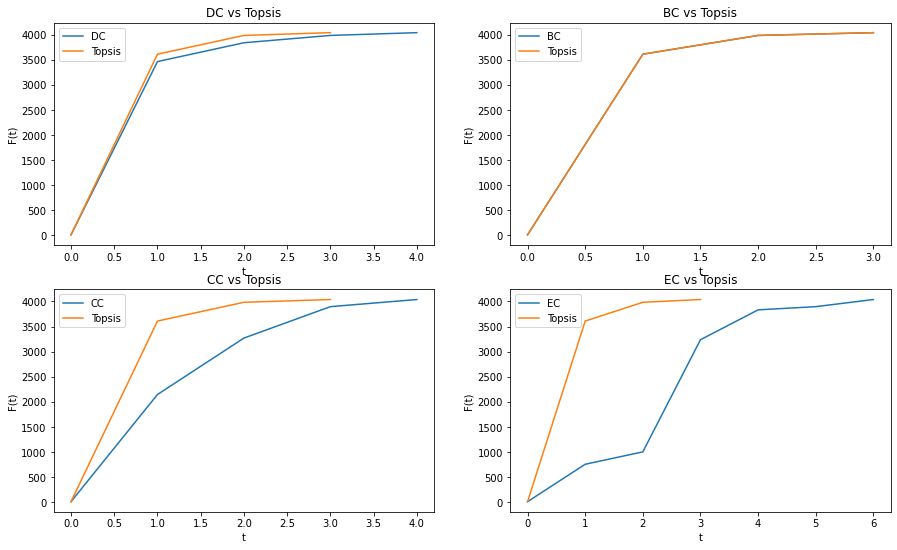

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(15, 9))
axs[0, 0].plot(Rank_DC['iteration'], Rank_DC['Nb_infected'], label="DC")
axs[0, 0].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[0, 0].set_title("DC vs Topsis")
axs[0, 0].legend()

axs[0, 1].plot(Rank_BC['iteration'], Rank_BC['Nb_infected'], label="BC")
axs[0, 1].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[0, 1].set_title("BC vs Topsis")
axs[0, 1].legend()

axs[1, 0].plot(Rank_CC['iteration'], Rank_CC['Nb_infected'], label="CC")
axs[1, 0].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[1, 0].set_title("CC vs Topsis")
axs[1, 0].legend()

axs[1, 1].plot(Rank_EC['iteration'], Rank_EC['Nb_infected'], label="EC")
axs[1, 1].plot(Rank_Topsis['iteration'], Rank_Topsis['Nb_infected'], label="Topsis")
axs[1, 1].set_title("EC vs Topsis")
axs[1, 1].legend()

for ax in axs.flat:
    ax.set(xlabel='t', ylabel='F(t)')

# Discussion

In [24]:
keyList = res.head(10).Node.tolist()
myDict = {key: key for key in keyList}

In [25]:
with open('Data/networkShape.pkl', 'rb') as f:
    pos = pickle.load(f)

(-0.7252260923385621,
 0.6698352575302124,
 -1.0741376757621766,
 0.5568911910057068)

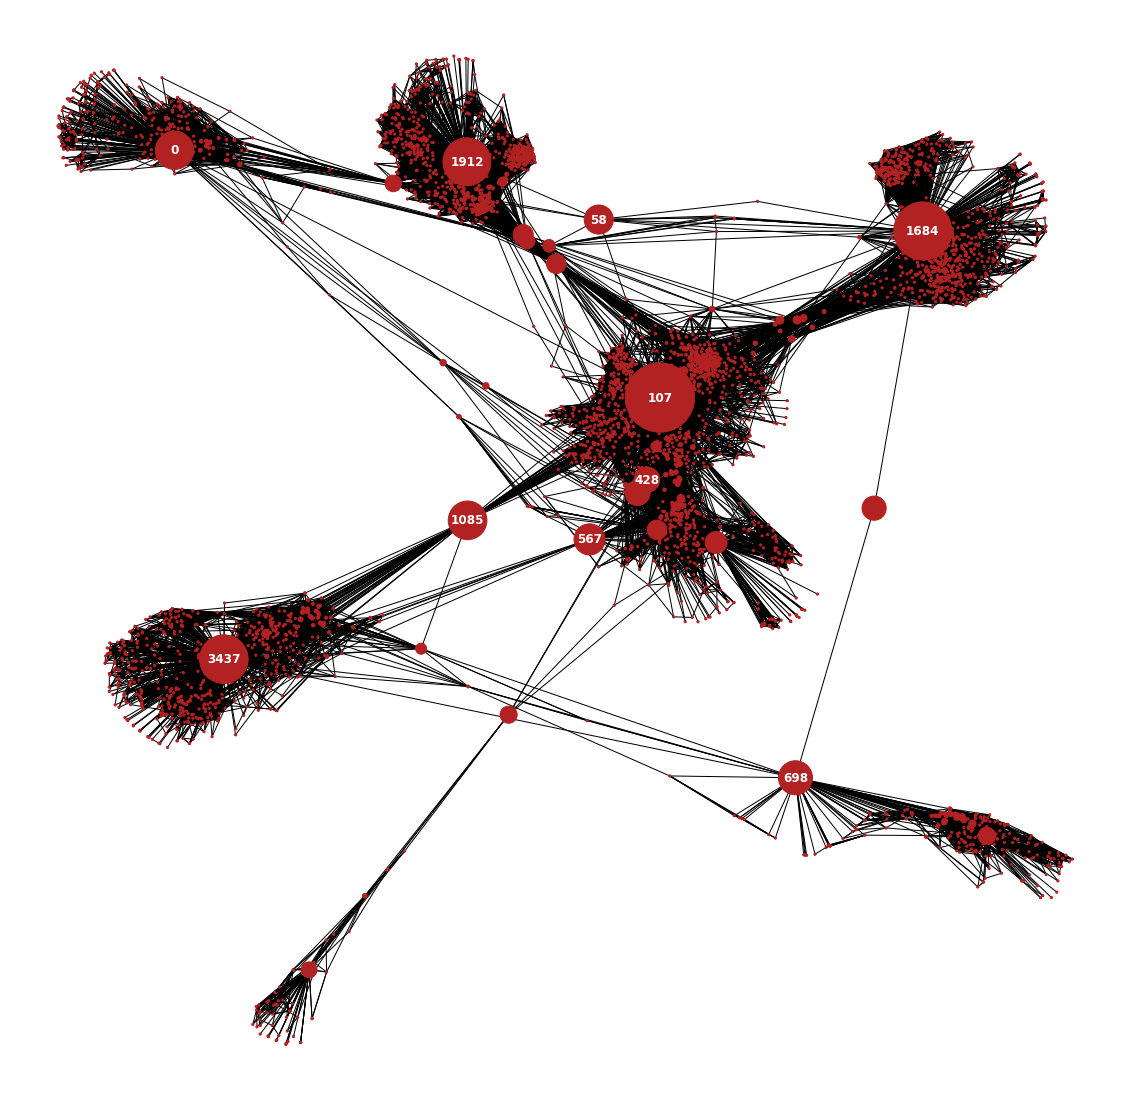

In [26]:
betweennessCentrality = nx.betweenness_centrality(Graph,normalized=True, endpoints=True)
node_size =  [v * 10000 for v in betweennessCentrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(Graph, pos=pos,node_color='firebrick', with_labels=False,
                 node_size=node_size )
labels=nx.draw_networkx_labels(Graph,pos = pos, labels=myDict, font_color='white', font_weight='bold')
plt.axis('off')